<a href="https://colab.research.google.com/github/Anushka-999/Tourist-Demographics-and-Behavior-Analysis/blob/main/Fraud_Detection_and_Transaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn pandas-profiling


In [ ]:
# Install a compatible version of pydantic
!pip install pydantic==1.10.9

# Uninstall pandas-profiling if already installed
!pip uninstall pandas-profiling -y

# Install ydata-profiling (the updated version of pandas-profiling)
!pip install ydata-profiling

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Optional: For generating an automated EDA report using the updated package
from ydata_profiling import ProfileReport


Found existing installation: pandas-profiling 3.0.0
Uninstalling pandas-profiling-3.0.0:
  Successfully uninstalled pandas-profiling-3.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.7/431.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.9
    Uninstalling pydantic-1.10.9:
      Successfully uninstalled pydantic-1.10.9
  Attempting uninstall: imagehash
    Found existing installation: ImageHash 4.3.2
    Uninstalling ImageHash-4.3.2:
      Successfully uninstalled ImageHash-4.3.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.1
    Uninstalling visions-0.7.1:
      Successfully uninstalled visions-0.7.1


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load your dataset from a CSV file (ensure you've uploaded your CSV to Colab)
df = pd.read_csv('fraud_dataset.csv')

# Preview the first few rows of the dataset
print(df.head())

# Check data types and overall info
print(df.info())

# Convert 'transaction_time' to a datetime object for easier manipulation
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

# If needed, handle missing values (e.g., drop or fill)
# Example: df = df.dropna()  OR  df.fillna(method='ffill', inplace=True)

# Remove duplicate rows to ensure data quality
df.drop_duplicates(inplace=True)


   transaction_id  customer_id  merchant_id   amount     transaction_time  \
0               1         1082         2027  5758.59  2023-01-01 00:00:00   
1               2         1015         2053  1901.56  2023-01-01 00:00:01   
2               3         1004         2035  1248.86  2023-01-01 00:00:02   
3               4         1095         2037  7619.05  2023-01-01 00:00:03   
4               5         1036         2083  1890.10  2023-01-01 00:00:04   

   is_fraudulent   card_type location purchase_category  customer_age  \
0              0  MasterCard  City-30       Gas Station            43   
1              1        Visa  City-47   Online Shopping            61   
2              1  MasterCard   City-6       Gas Station            57   
3              1    Discover   City-6            Travel            59   
4              1  MasterCard  City-34            Retail            36   

     transaction_description  
0  Purchase at Merchant-2027  
1  Purchase at Merchant-2053  
2  Pu

In [5]:
# Get numerical summary statistics (e.g., mean, std, min, max)
print(df.describe())

# Describe categorical features (shows count, unique values, frequency)
print(df[['card_type', 'location', 'purchase_category']].describe())


       transaction_id   customer_id   merchant_id        amount  \
count     10000.00000  10000.000000  10000.000000  10000.000000   
mean       5000.50000   1051.272300   2050.486600   4958.381617   
min           1.00000   1001.000000   2001.000000     10.610000   
25%        2500.75000   1026.000000   2025.000000   2438.175000   
50%        5000.50000   1052.000000   2050.000000   4943.945000   
75%        7500.25000   1076.000000   2076.000000   7499.312500   
max       10000.00000   1100.000000   2100.000000   9999.750000   
std        2886.89568     28.864062     28.877801   2899.699675   

                    transaction_time  is_fraudulent  customer_age  
count                          10000   10000.000000  10000.000000  
mean   2023-01-01 01:23:19.500000256       0.506800     44.047500  
min              2023-01-01 00:00:00       0.000000     18.000000  
25%    2023-01-01 00:41:39.750000128       0.000000     31.000000  
50%       2023-01-01 01:23:19.500000       1.000000     

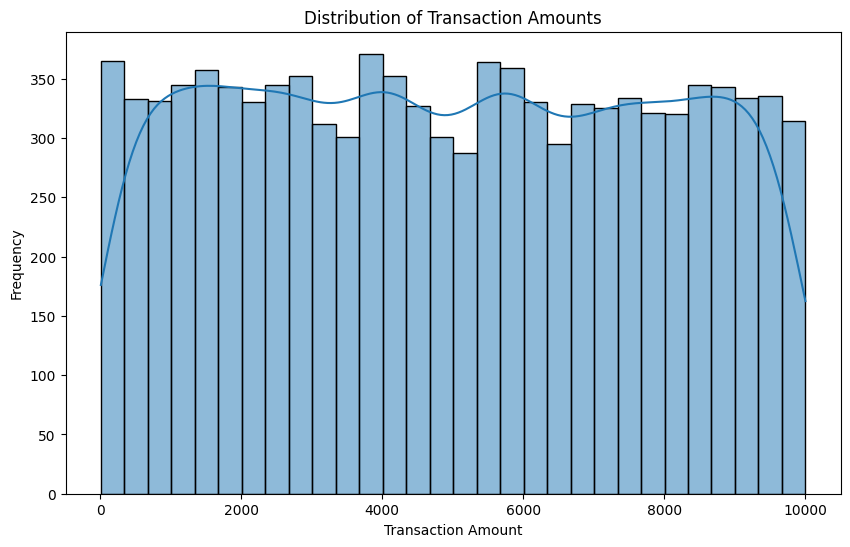

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


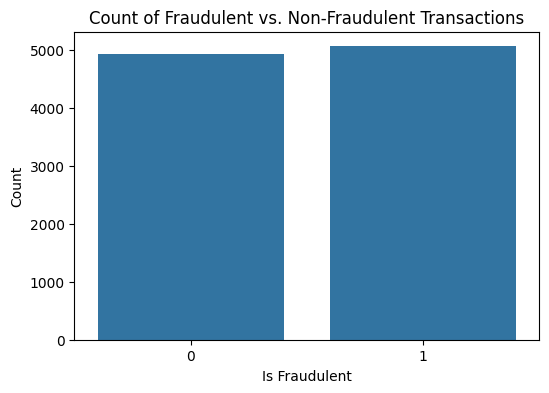

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraudulent', data=df)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.show()


<ipython-input-11-16cebc4b55ee>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_transactions = df.resample('H').size()


transaction_time
2023-01-01 00:00:00    3600
2023-01-01 01:00:00    3600
2023-01-01 02:00:00    2800
Freq: h, dtype: int64


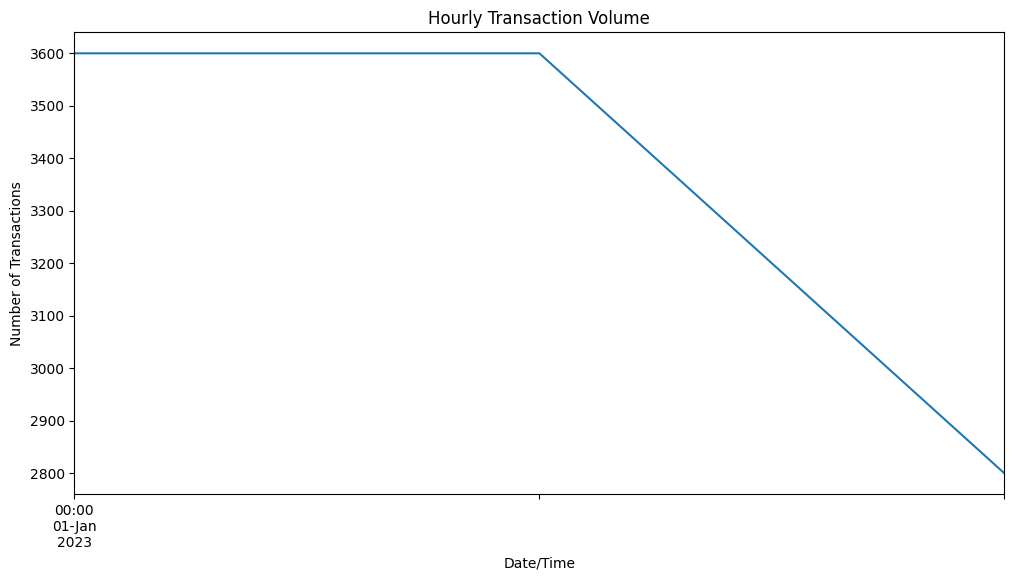

In [11]:
hourly_transactions = df.resample('H').size()
print(hourly_transactions.head())

plt.figure(figsize=(12,6))
hourly_transactions.plot()
plt.title('Hourly Transaction Volume')
plt.xlabel('Date/Time')
plt.ylabel('Number of Transactions')
plt.show()



In [13]:
# Ensure that the index is a datetime index
print(df.index.dtype)

# Create new columns using the index (which holds the transaction_time)
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['month'] = df.index.month

# Display the first few rows to confirm
print(df[['hour', 'day_of_week', 'month']].head())


datetime64[ns]
                     hour  day_of_week  month
transaction_time                             
2023-01-01 00:00:00     0            6      1
2023-01-01 00:00:01     0            6      1
2023-01-01 00:00:02     0            6      1
2023-01-01 00:00:03     0            6      1
2023-01-01 00:00:04     0            6      1


In [15]:
# Initialize a label encoder for converting text labels into numeric form
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder for converting text labels into numeric form
le = LabelEncoder()
df['card_type_enc'] = le.fit_transform(df['card_type'])
df['location_enc'] = le.fit_transform(df['location'])
df['purchase_category_enc'] = le.fit_transform(df['purchase_category'])


In [18]:
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Define feature set and target variable
features = ['amount', 'customer_age', 'hour', 'day_of_week', 'month',
            'card_type_enc', 'location_enc', 'purchase_category_enc']
target = 'is_fraudulent'

X = df[features]
y = df[target]

# Scale numerical features (especially when amounts vary widely)
scaler = StandardScaler()
X[['amount', 'customer_age']] = scaler.fit_transform(X[['amount', 'customer_age']])


<ipython-input-18-9c5af8d92dda>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['amount', 'customer_age']] = scaler.fit_transform(X[['amount', 'customer_age']])


In [22]:
# Import necessary functions from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.48      0.49      0.48      1480
           1       0.50      0.50      0.50      1520

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000



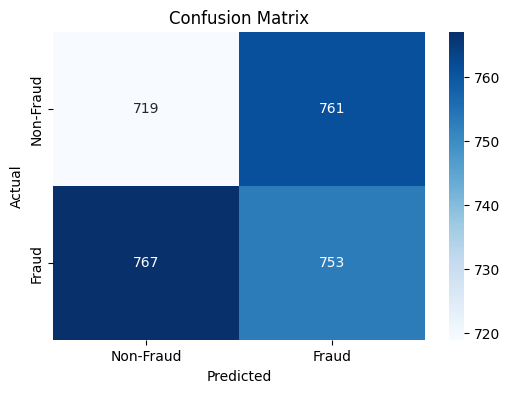

In [23]:
# Create a confusion matrix for a more detailed error analysis
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



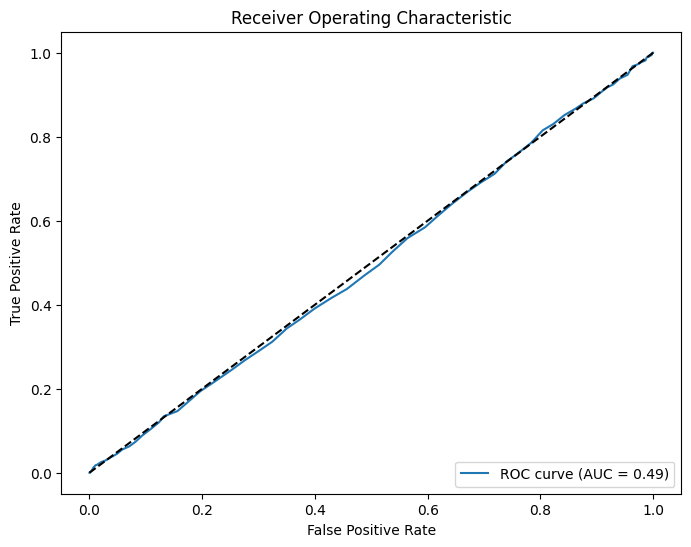

In [24]:
# Calculate probabilities to plot the ROC curve
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [25]:
# Add model predictions to the original dataframe
df['predicted_is_fraudulent'] = model.predict(X)

# Export the dataframe to CSV
df.to_csv('fraud_analysis_results.csv', index=False)
